# Job Scrapping
This project aims to find out which technologies are most used in computer engineering job postings, which state has more job postings, which job title has the most job postings, which words are most related with computer engineering.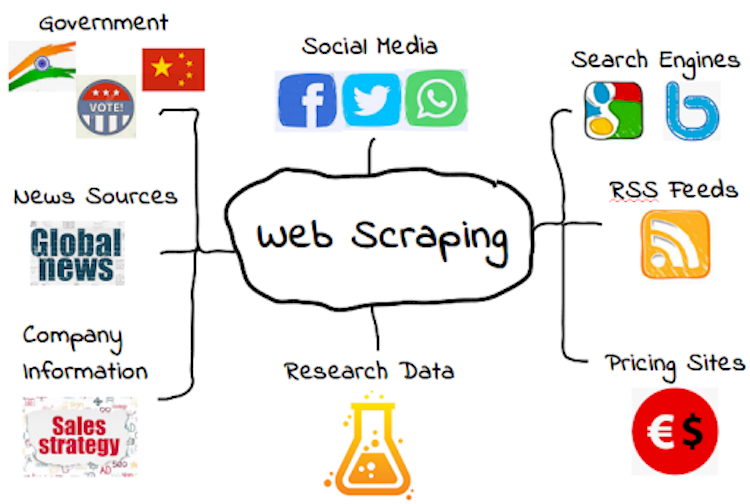


## Setup

In [4]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

     |████████████████████████████████| 979 kB 27.8 MB/s 
     |████████████████████████████████| 138 kB 43.0 MB/s 
     |████████████████████████████████| 359 kB 42.4 MB/s 
     |████████████████████████████████| 4.0 MB 46.9 MB/s 
     |████████████████████████████████| 55 kB 4.5 MB/s 
     |████████████████████████████████| 58 kB 6.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InR

## Import Libraries

In [315]:
import pandas as pd 
from selenium import webdriver
from selenium.webdriver.common.by import By
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

sns.set(rc={'figure.figsize':(11.7,8.27)})

## Set Chrome Options

In [316]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver', options= chrome_options)

## Get Jobs Page

In [321]:
browser.get("https://www.jobs.com/en-us/jobs/search?q=computer+engineering&where=&page=15")

## Job Page Parser


In [322]:
def parseJobPage():
  name = browser.find_element(by= By.NAME, value='job_title')
  location = browser.find_element(by= By.NAME, value='job_company_location')
  description = browser.find_element(by= By.CSS_SELECTOR, value='#app > div.layout-container > div > div > div > div.jobcontainer__JobBody-sc-1xzg5b6-3.bhlLiV > div > div.jobcontainer__DescriptionContainer-sc-1xzg5b6-10.kPUynM.job-description > div > div > div')
  
  return name.get_attribute('innerHTML'), location.get_attribute('innerHTML'), description.get_attribute('innerHTML')


In [323]:
results_cards = browser.find_elements(by= By.CLASS_NAME, value='results-card')
names = []
locations = []
descriptions = []
job_links = []
for result_card in results_cards:
  loc = result_card.find_element(by=By.CLASS_NAME, value='title-company-location')
  link = loc.find_element(by=By.TAG_NAME, value='a')
  job_links.append(link.get_attribute('href'))

print(job_links)

for job_link in job_links:
  browser.get(job_link)
  name, location, description = parseJobPage()
  names.append(name)
  locations.append(location)
  descriptions.append(description)

print(names)
print(locations)
print(descriptions)

['https://www.jobs.com/en-us/jobs/sr-software-engineer-sunnyvale-ca--96aa972d-cf57-4d60-ad63-48b9dbdea586', 'https://www.jobs.com/en-us/jobs/fpga-design-engineer-wilsonville-or--bccab57e-616c-4e7b-8d09-6dbe8db37ffe', 'https://www.jobs.com/en-us/jobs/sr-software-engineer-mason-oh--fa6aac2c-9e1a-43f9-9870-43bff4a0c159', 'https://www.jobs.com/en-us/jobs/lead-cloud-ops-engineer-chapel-hill-nc--557a22b2-23ea-414e-b615-1e3eea917596', 'https://www.jobs.com/en-us/jobs/senior-java-engineer-aiken-sc--87a1d45e-6793-4dcf-aa7b-77c016c7fdb4', 'https://www.jobs.com/en-us/jobs/lead-software-engineer-customer-identity-access-management-baltimore-md--18954ffd-d467-49c5-9f7e-17f0eb6d8d11', 'https://www.jobs.com/en-us/jobs/sr-software-engineer-dayton-oh--f038c7d4-a543-4b8d-b7ab-48c951f50cd1', 'https://www.jobs.com/en-us/jobs/wlan-wi-fi-test-engineer-holtsville-ny--9ecccc1e-357c-47df-8758-ec5852953021', 'https://www.jobs.com/en-us/jobs/applications-engineer-webster-ny--02b46c02-b211-4ef9-833b-f86bf9c43c53'

# Visualizing Data

## Most Popular States


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


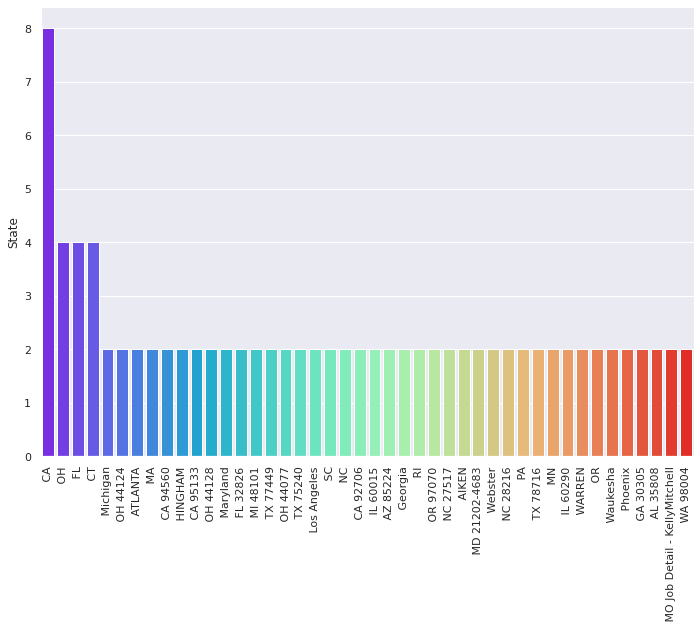

In [302]:
new_locations=[]

for location in locations:
  location = location.split(',')
  new_locations.append(location)

data = pd.DataFrame(new_locations)
data.columns = ["one","two", "three", "four", "five"]
data.head()

ax = sns.barplot(data.two.value_counts().index, y=data.two.value_counts(), data=data, palette="rainbow")
ax.set_ylabel("State")
for item in ax.get_xticklabels():
    item.set_rotation(90)


## Cleaning Description Data

In [303]:
## Creating a Dataframe with list
df = pd.DataFrame(descriptions)

## Deleting useless words
df = df.replace(['\n',
                 '^.*?Expect', 
                 '^.*?Qualifications', 
                 '^.*?Required', 
                 '^.*?expected', 
                 '^.*?Responsibilities', 
                 '^.*?Requirements', 
                 '^.*?QualificationsRequired1', 
                 '^.*?great', 
                 '^.*?Looking For', 
                 '^.*?ll Need', 
                 '<strong>',
                 '<b>',
                 '<p>',
                 '</p>',
                 '<li>',
                 '</li>',
                 '</b>',
                  '<u>',
                 '<h2>',
                 '<h3>',
                 '</h3>',
                 '</h2>',
                 '</div>',
                 '<div>',
                 '\t',
                 '<ul>',
                 '<li class="MsoNoSpacing">',
                 '<li>',
                 '<h5>',
                 '<h4>',
                 '</h4>',
                 '</h5>',
                 '</ul>',
                 ':',
                 '</u>',
                 '<em>^.*?',
                 '<em>',
                 '</strong>',
                 '</span>^.*?',
                 '<span>',
                 '<span aria-label="to">',
                 '</span>',
                 '^.*?</strong>',
                 '</strong>^.*?',
                 '^.*?<p>',
                 '&amp;',
                 '&nbsp;',
                 '<br>^.*?',
                 '<br>',
                 '^.*?</br>',
                 ], '', regex=True)

df.tail(10)

,0
90,Minimum B.S. degree from an ABET accredited sc...
91,• Understanding the flow of code and how it i...
92,•Owns one or more complex Circuit Card Assembl...
93,PURPOSE OF THE JOBThe Electrical Controls Engi...
94,Working in cross functional teams to define se...
95,"<div name=""eeo_hide_content""><p class=""MsoNorm..."
96,"üsumlaut, part of Accenture, is a 4500+ people..."
97,Remote Sr. Software Engineer (C#/.NET)Our clie...
98,EducationBachelor's degree in Computer Scienc...
99,ed Approaches challenges with curiosity and cr...


## WorkCloud

### Delete Stopwords

In [305]:
## Setup wordcloud
stopwords = set(STOPWORDS)

## Selecting useless words 
badwords = {'gender', 'experience', 'application', 'Apply', 'salary', 'todos', 'os', 'company', 'identity', 'sexual', 'orientation', 'type', 'help', 'project', 'requirements', 'America',
           'sexual', 'committed','client', 'benefits', 'Benefits', 'benefit', 'other', 'others', 'ago', 'days', 'day', 'posted', 'position', 'location', 'plus', 'candidate', 'Qualification',
          'world', 'year', 'save', 'information', 'e', 'equal', 'oppotunity', 'ambiente', 'will', 'you', 'theirs', 'products', 'offer', 'test', 'providing', 'best', 'standard',
          'national origin', 'work', 'years', 'clients', 'creating', 'is', 'are', 'a', 'an', 'thing', 'their', 'preferred', 'platform', 'contract', 'infrastructure', 'state', 'local',
          'employer','em', 'working', 'data', 'people', 'the', 'one', 'knowledges', 'plataform', 'management', 'provide', 'requirement', 'high', 'multiple', 'disability', 'genetic',
          'para', 'software', 'opportunity', 'solution', 'national', 'origin', 'option', 'anything', 'preffered', 'expertise', 'AUSGAR', 'companies', 'global', 'group', 'projects',
          'team', 'veteran', 'status', 'etc', 'belive','Scientist', 'job',  'knowledge', 'toll', 's', 'time','solutions', 'race', 'color', 'staffing', 'agencies', 'ConsultUSA',
          'show', 'tool', 'regard', 'without', 'make', 'ao', 'life', 'yours', 'yourself', 'nothing', 'including', 'founded', 'services', 'support', 'customers', 'Capganini',
          'interested', 'diversidade', 'proud', 'ability', 'sobre', 'options', 'using', 'product', 'customer', 'employees', 'service', 'control', 'based', 'inc', 'FM', 'member',
          'building', 'skill', 'model', 'religion', 'Share', 'receive', 'consideration',  'must', 'us', 'size', 'skills', 'needed', 'tools', 'customer', 'Industry', 'Agencies',
          'Strong', 'Pay', 'range', 'available', 'part', 'employment', 'qualified', 'applicants', 'gympass', 'employee', 'need', 'applications', 'insurance', 'countries', 'government',
          'Yes', 'believe', 'moment',  'new', 'Try', 'Premium', 'employee', 'unavailable', 'include', 'Fortune', 'FM Global', 'every', 'first', 'understanding', 'recognized',
          'hiring', 'trends', 'recent', 'build', 'career', 'total', 'free', 'Full'}

## Deleting the useless words
stopwords.update(badwords)

## Plot parameters
wordcloud = WordCloud(background_color='black', 
                      stopwords=stopwords, 
                      max_words=100, 
                      max_font_size=50, 
                      random_state=42).generate("".join(df[0]))

## Visualize - Most Related Words

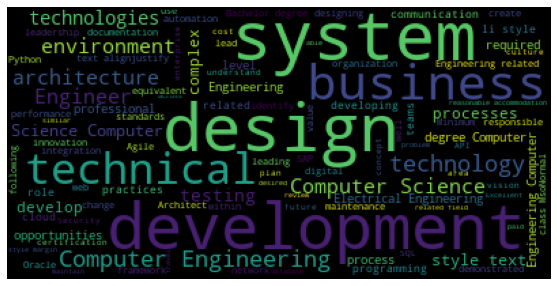

In [306]:
## Plot
plt.figure(figsize=(10,5)) 
fig = plt.figure(1) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

## Most Used Languages

### Count Languages

In [307]:
java_count=0
c_cplus_count=0
javascript_count=0
python_count=0
r_count=0
c_sharp_count=0
qt_count = 0
ruby_count = 0
sql_count = 0

languages_count=[]
for description in descriptions:
  if(description.count('Java') >= 1 or description.count('JAVA') >= 1 or description.count('java') >= 1):
    java_count = java_count + 1
  if(description.count('C/C++') >= 1 or description.count('c/c++') >= 1):
    c_cplus_count = c_cplus_count + 1
  if(description.count('Javascript') >= 1 or description.count('JavaScript') or description.count('javascript')):
    javascript_count= javascript_count + 1
  if(description.count('Python') >= 1 or description.count('python') >= 1):
    python_count= python_count + 1
  if(description.count('R ') >= 1):
    r_count= r_count + 1
  if(description.count('C#') >= 1 or description.count('c#') >= 1):
    c_sharp_count= c_sharp_count + 1
  if(description.count('Qt') >= 1 or description.count('QT') >= 1):
    qt_count= qt_count + 1
  if(description.count('Ruby') >= 1 or description.count('ruby') >= 1):
    ruby_count= ruby_count + 1
  if(description.count('SQL') >= 1 or description.count('sql') >= 1):
    sql_count= sql_count + 1 

languages_count.append(java_count)
languages_count.append(c_cplus_count)
languages_count.append(javascript_count)
languages_count.append(python_count)
languages_count.append(r_count)
languages_count.append(c_sharp_count)
languages_count.append(qt_count)
languages_count.append(ruby_count)
languages_count.append(sql_count)

### Converting DataFrame

In [309]:
languages = ["Java", "C/C++", "Javascript", "Python", "R", "C#", "Qt", "Ruby", "SQL"]

list_of_tuples = list(zip(languages, languages_count))  
  
df = pd.DataFrame(list_of_tuples,
                  columns = ['Languages', 'Count'])
print(df)

    Languages  Count
0        Java     30
1       C/C++     12
2  Javascript     14
3      Python     30
4           R     16
5          C#     18
6          Qt      6
7        Ruby      2
8         SQL     26


### Visualize - Most Used Languages

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


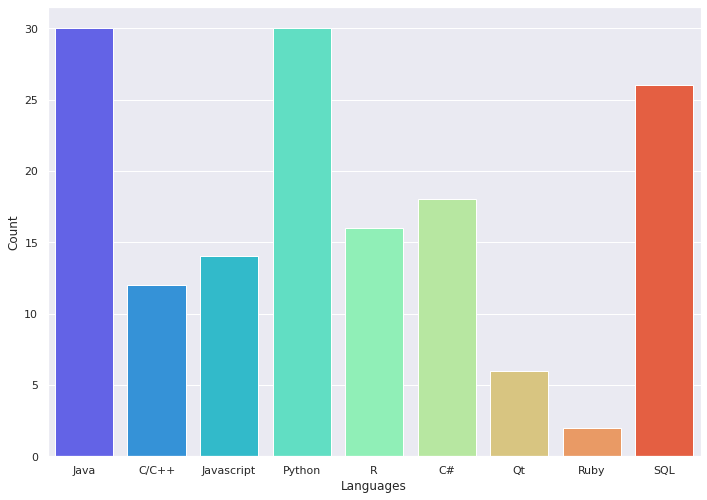

In [310]:
ax = sns.barplot(df.Languages, y=df.Count, data=df, palette="rainbow")

### Windows vs Linux

  Operating System  Count
0            Linux     24
1          Windows     14


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


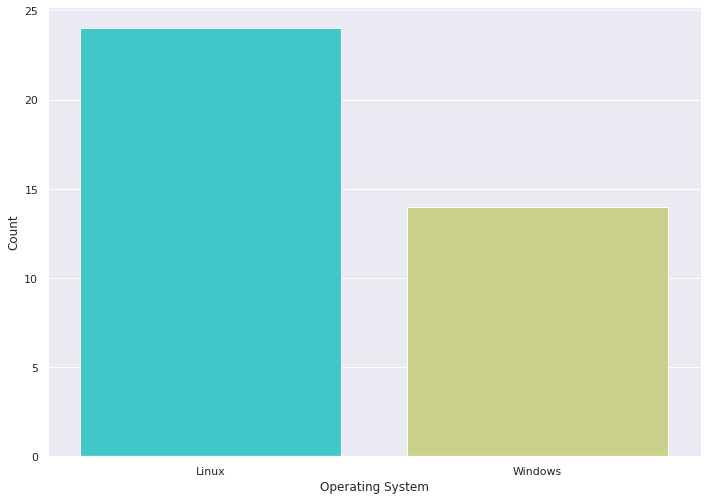

In [311]:
linux_count = 0
windows_count = 0

os_counts=[]
for description in descriptions:
  if(description.count('Linux') >= 1 or description.count('LINUX') >= 1 or description.count('linux') >= 1):
    linux_count = linux_count + 1
  if(description.count('Windows') >= 1 or description.count('windows') >= 1 or description.count('WINDOWS') >= 1):
    windows_count = windows_count + 1
  
os_counts.append(linux_count)
os_counts.append(windows_count)

operating_systems = ["Linux", "Windows"]

list_of_tuples = list(zip(operating_systems, os_counts))  
  
df = pd.DataFrame(list_of_tuples,
                  columns = ['Operating System', 'Count'])
print(df)

ax = sns.barplot(df.columns[0], y=df.Count, data=df, palette="rainbow")

### Some Popular Technologies

    Technology  Count
0  Spring Boot     24
1         .NET     14
2          GIT     16
3       OpenGL      2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


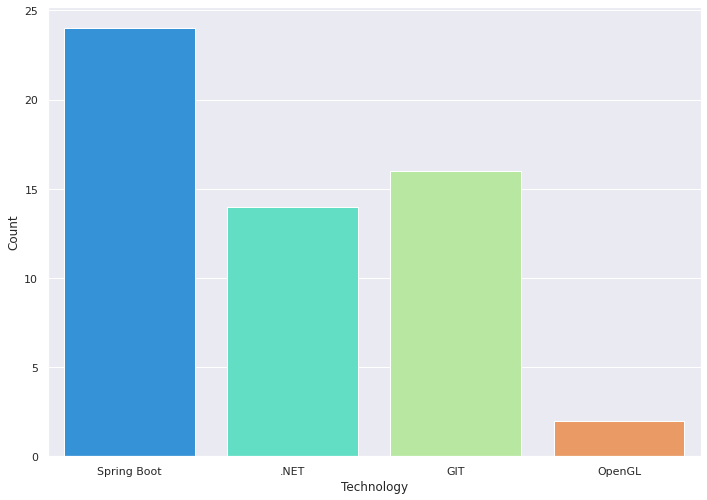

In [312]:
spring_count = 0
dotnet_count = 0
git_count = 0
openGL_count = 0

os_counts=[]
for description in descriptions:
  if(description.count('Spring Boot') >= 1 or description.count('Spring') >= 1 or description.count('spring') >= 1 or description.count('Spring boot') >= 1 or description.count('spring boot') >= 1):
    spring_count = spring_count + 1
  if(description.count('.NET') >= 1 or description.count('.net') >= 1 ):
    dotnet_count = dotnet_count + 1
  if(description.count('GIT') >= 1 or description.count('Git,') >= 1 or description.count('git,') >= 1 or description.count('git ') >= 1 or description.count('Git ') >= 1):
    git_count = git_count + 1
  if(description.count('OpenGL') >= 1 or description.count('openGL')):
    openGL_count = openGL_count + 1
  
os_counts.append(linux_count)
os_counts.append(windows_count)
os_counts.append(git_count)
os_counts.append(openGL_count)

operating_systems = ["Spring Boot", ".NET", "GIT", "OpenGL"]

list_of_tuples = list(zip(operating_systems, os_counts))  
  
df = pd.DataFrame(list_of_tuples,
                  columns = ['Technology', 'Count'])
print(df)

ax = sns.barplot(df.columns[0], y=df.Count, data=df, palette="rainbow")

### Expected Experiences based on Year


        Year  Count
0   1+ Years      4
1   2+ Years     18
2   3+ Years     18
3   4+ Years      8
4   5+ Years     24
5  10+ Years     14


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


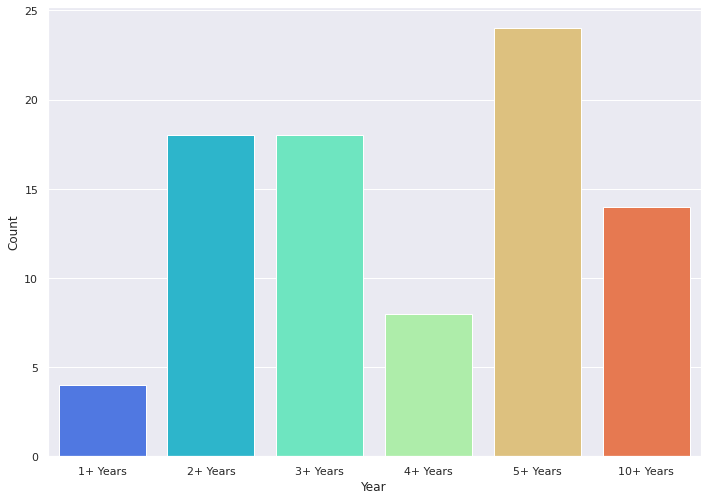

In [313]:
one_count = 0
two_count = 0
three_count = 0
four_count = 0
five_count = 0
ten_count = 0

year_counts=[]
for description in descriptions:
  if(description.count('1-2 years') >= 1 or description.count('1 years') >= 1 or description.count('1+ years') >= 1 
     or description.count('1-3 years') or description.count('1 + years') >= 1):
    one_count = one_count + 1
  if(description.count('2 years') >= 1 or description.count('1-3 years') >= 1 or description.count('1-2 years') >= 1 
     or description.count('2+ years') >= 1 or description.count('2 + years') >= 1):
    two_count = two_count + 1
  if(description.count('3 years') >= 1 or description.count('3-5 years') >= 1 or description.count('3+ years') >= 1 
     or description.count('3 + years ') >= 1 or description.count('1-3 years') >= 1):
    three_count = three_count + 1
  if(description.count('4 years') >= 1 or description.count('4-5 years') >= 1 or description.count('4-6 years') >= 1 or description.count('4+ years') >= 1 
     or description.count('4 + years ') >= 1 or description.count('1-4 years') >= 1):
    four_count = four_count + 1
  if(description.count('5 years') >= 1 or description.count('3-5 years') >= 1 or description.count('5+ years') >= 1 
     or description.count('5 + years ') >= 1 or description.count('5-7 years') >= 1):
    five_count = five_count + 1
  if(description.count('10 years') >= 1 or description.count('10+ years') >= 1 or description.count('10 + years ') >= 1):
    ten_count = ten_count + 1
  
year_counts.append(one_count)
year_counts.append(two_count)
year_counts.append(three_count)
year_counts.append(four_count)
year_counts.append(five_count)
year_counts.append(ten_count)

years = ["1+ Years", "2+ Years", "3+ Years", "4+ Years", "5+ Years", "10+ Years"]

list_of_tuples = list(zip(years, year_counts))  
  
df = pd.DataFrame(list_of_tuples,
                  columns = ['Year', 'Count'])
print(df)

ax = sns.barplot(df.columns[0], y=df.Count, data=df, palette="rainbow")

### Job Titles

   Job Title  Count
0     Junior     24
1  Mid-Level     14
2     Senior     16
3       Lead      2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


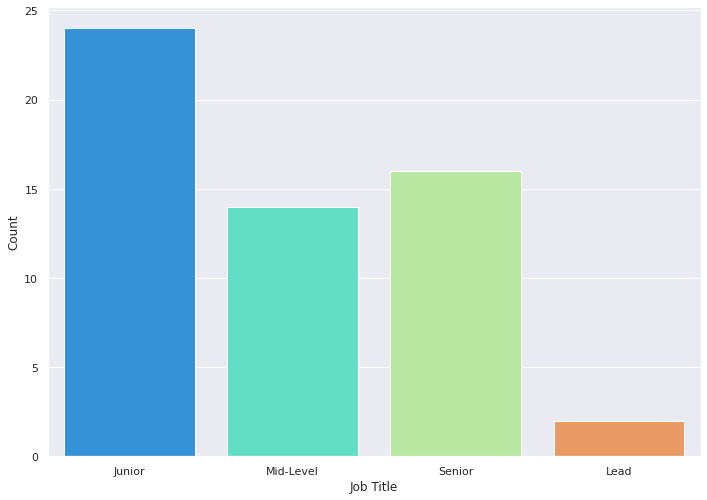

In [314]:
junior_count = 0
mid_count = 0
senior_count = 0
lead_count = 0
architect_count = 0

type_counts=[]
for name in names:
  if(name.count('Junior') >= 1 or name.count('Jr') >= 1 or name.count('Jr.') >= 1 or name.count('jr') >= 1 or name.count('junior') >= 1 ):
    junior_count = junior_count + 1
  if(name.count('Mid Level') >= 1 or name.count('Mid-Level') >= 1 or name.count('mid-level') >= 1 or name.count('mid level') >= 1):
    mid_count = mid_count + 1
  if(name.count('Senior') >= 1 or name.count('Sr') >= 1 or name.count('Sr.') >= 1 or name.count('sr') >= 1 or name.count('senior') >= 1):
    senior_count = senior_count + 1
  if(name.count('Lead') >= 1 or name.count('lead') >= 1):
    lead_count = lead_count + 1
  if(name.count('Architect') >= 1 or name.count('architect') >= 1):
    architect_count = architect_count + 1
  
type_counts.append(junior_count)
type_counts.append(mid_count)
type_counts.append(senior_count)
type_counts.append(lead_count)
type_counts.append(architect_count)

operating_systems = ["Junior", "Mid-Level","Senior", "Lead", "Architect"]

list_of_tuples = list(zip(operating_systems, os_counts))  
  
df = pd.DataFrame(list_of_tuples,
                  columns = ['Job Title', 'Count'])
print(df)

ax = sns.barplot(df.columns[0], y=df.Count, data=df, palette="rainbow")